# Machine Translation Using NLP (English to Hindi)

By Group-16\
Musharraf Alam,
   Asawa Aryan,
   Yash Balchandani.

Importing all the required packages

In [111]:
import numpy as np
import pandas as pd

In [112]:
import numpy as np
import pandas as pd
import tensorflow
import keras
from keras.models import Model
from keras.layers import Input, LSTM, Dense,TimeDistributed,Embedding,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from string import digits
import nltk
import re
import string
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

<ipython-input-112-885dfb131f9f>:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [113]:
lines = pd.read_csv('hindi_english_parallel.csv')
lines = lines[:30000]
lines.head()

,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,Give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,Accerciser Accessibility Explorer
2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the top panel
4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है,A list of plugins that are disabled by default


Converted one multiple datatypes into single expression using lambda function and then converting it to lower case

In [114]:

lines['english']=lines['english'].apply(lambda x: str(x))
lines['hindi']=lines['hindi'].apply(lambda x: str(x))
lines['english']=lines['english'].apply(lambda x: x.lower())
lines['hindi']=lines['hindi'].apply(lambda x: x.lower())

In [115]:
lines['hindi'][0]

'अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें'

Removal 
of apostrophe which system adds by default 

In [116]:
lines['english']=lines['english'].apply(lambda x: re.sub("'", '', x))
lines['hindi']=lines['hindi'].apply(lambda x: re.sub("'", '', x))

In [117]:
lines.head()

,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,accerciser accessibility explorer
2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,the default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,the default plugin layout for the top panel
4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है,a list of plugins that are disabled by default


In [118]:
exclude = set(string.punctuation)
lines['english']=lines['english'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines['hindi']=lines['hindi'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [119]:
lines.head()

,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,accerciser accessibility explorer
2,निचले पटल के लिए डिफोल्ट प्लगइन खाका,the default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लगइन खाका,the default plugin layout for the top panel
4,उन प्लगइनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है,a list of plugins that are disabled by default


In [120]:
remove_digits = str.maketrans('', '', digits)

In [121]:
remove_digits

{48: None,
 49: None,
 50: None,
 51: None,
 52: None,
 53: None,
 54: None,
 55: None,
 56: None,
 57: None}

In [122]:
a = lines['english'][0].translate(remove_digits)

In [123]:
a

'give your application an accessibility workout'

Here we remove the digits from the database as they are of no use to us

In [125]:
remove_digits = str.maketrans('', '', digits)
lines['english']=lines['english'].apply(lambda x: x.translate(remove_digits))
lines['hindi']=lines['hindi'].apply(lambda x: x.translate(remove_digits))

lines['hindi'] = lines['hindi'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))


lines['english']=lines['english'].apply(lambda x: x.strip())
lines['hindi']=lines['hindi'].apply(lambda x: x.strip())
lines['english']=lines['english'].apply(lambda x: re.sub(" +", " ", x))
lines['hindi']=lines['hindi'].apply(lambda x: re.sub(" +", " ", x))

Removal of white spaces

In [126]:
'hello! how are you buddy?'.strip()

'hello! how are you buddy?'

In [127]:
lines['english'][0]

'give your application an accessibility workout'

Here we add Start and End tag for hindi sentences

In [128]:
lines['hindi'] = lines['hindi'].apply(lambda x : 'START_ '+ x + ' _END')

In [129]:
lines['hindi'][0]

'START_ अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें _END'

In [130]:
all_eng_words=set()
for eng in lines['english']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_hindi_words=set()
for hin in lines['hindi']:
    for word in hin.split():
        if word not in all_hindi_words:
            all_hindi_words.add(word)

In [131]:
lines.head()

,hindi,english
0,START_ अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें _END,give your application an accessibility workout
1,START_ एक्सेर्साइसर पहुंचनीयता अन्वेषक _END,accerciser accessibility explorer
2,START_ निचले पटल के लिए डिफोल्ट प्लगइन खाका _END,the default plugin layout for the bottom panel
3,START_ ऊपरी पटल के लिए डिफोल्ट प्लगइन खाका _END,the default plugin layout for the top panel
4,START_ उन प्लगइनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है _END,a list of plugins that are disabled by default


In [132]:
lines['length_eng']=lines['english'].apply(lambda x:len(x.split(" ")))
lines['length_hin']=lines['hindi'].apply(lambda x:len(x.split(" ")))

In [133]:
lines.head()
lines[lines['length_eng']>30].shape

(102, 4)

In [134]:
lines=lines[lines['length_eng']<=20]
lines=lines[lines['length_hin']<=20]

In [135]:
print("maximum length of Hindi Sentence ",max(lines['length_hin']))
print("maximum length of English Sentence ",max(lines['length_eng']))

maximum length of Hindi Sentence  20
maximum length of English Sentence  20


In [136]:
max_length_src=max(lines['length_eng'])
max_length_tar=max(lines['length_hin'])

put english_100k.txt file in to run pos tagging for the peoject C:\Users\<youradminProfilename>\AppData\Roaming\nltk_data\corpora\state_union

In [137]:
import nltk
nltk.download('state_union')
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("english_100k.txt")
sample_text = state_union.raw("english_100k.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text) #A

tokenized = custom_sent_tokenizer.tokenize(sample_text)   #B

def process_content():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)
    
    except Exception as e:
        print(str(e))


process_content()

[nltk_data] Downloading package state_union to C:\Users\Yash
[nltk_data]     Balchandani\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\state_union.zip.


[('english', 'JJ'), ('Give', 'NNP'), ('your', 'PRP$'), ('application', 'NN'), ('an', 'DT'), ('accessibility', 'NN'), ('workout', 'IN'), ('Accerciser', 'NNP'), ('Accessibility', 'NNP'), ('Explorer', 'NNP'), ('The', 'DT'), ('default', 'NN'), ('plugin', 'NN'), ('layout', 'NN'), ('for', 'IN'), ('the', 'DT'), ('bottom', 'JJ'), ('panel', 'NN'), ('The', 'DT'), ('default', 'NN'), ('plugin', 'NN'), ('layout', 'NN'), ('for', 'IN'), ('the', 'DT'), ('top', 'JJ'), ('panel', 'NN'), ('A', 'DT'), ('list', 'NN'), ('of', 'IN'), ('plugins', 'NNS'), ('that', 'WDT'), ('are', 'VBP'), ('disabled', 'VBN'), ('by', 'IN'), ('default', 'NN'), ('Highlight', 'NNP'), ('duration', 'NN'), ('The', 'DT'), ('duration', 'NN'), ('of', 'IN'), ('the', 'DT'), ('highlight', 'NN'), ('box', 'NN'), ('when', 'WRB'), ('selecting', 'VBG'), ('accessible', 'JJ'), ('nodes', 'NNS'), ('Highlight', 'NNP'), ('border', 'NN'), ('color', 'NN'), ('The', 'DT'), ('color', 'NN'), ('and', 'CC'), ('opacity', 'NN'), ('of', 'IN'), ('the', 'DT'), ('hi

In [138]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_hindi_words)
num_encoder_tokens, num_decoder_tokens

(2687, 3438)

In [139]:
num_decoder_tokens

3438

In [140]:
num_decoder_tokens += 1

In [141]:
num_decoder_tokens

3439

In [142]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [143]:
input_token_index

{'a': 1,
 'able': 2,
 'abort': 3,
 'aborted': 4,
 'about': 5,
 'above': 6,
 'absolute': 7,
 'ac': 8,
 'accelerator': 9,
 'accelerator…': 10,
 'accentuated': 11,
 'accept': 12,
 'acceptable': 13,
 'accepted': 14,
 'accerciser': 15,
 'access': 16,
 'accessed': 17,
 'accessibility': 18,
 'accessible': 19,
 'accessibles': 20,
 'according': 21,
 'accordion': 22,
 'ace': 23,
 'aces': 24,
 'across': 25,
 'act': 26,
 'acti': 27,
 'action': 28,
 'actionable': 29,
 'actions': 30,
 'activatable': 31,
 'activate': 32,
 'activated': 33,
 'active': 34,
 'actual': 35,
 'adaptive': 36,
 'add': 37,
 'added': 38,
 'addition': 39,
 'additional': 40,
 'addrcheck': 41,
 'address': 42,
 'addressbook': 43,
 'addresses': 44,
 'adds': 45,
 'add…': 46,
 'advance': 47,
 'advanced': 48,
 'advised': 49,
 'affects': 50,
 'after': 51,
 'again': 52,
 'against': 53,
 'agnes': 54,
 'aim': 55,
 'aisleriot': 56,
 'al': 57,
 'albert': 58,
 'alert': 59,
 'algorithm': 60,
 'alidate': 61,
 'all': 62,
 'alleys': 63,
 'allocat

In [144]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [145]:
reverse_input_char_index

{1: 'a',
 2: 'able',
 3: 'abort',
 4: 'aborted',
 5: 'about',
 6: 'above',
 7: 'absolute',
 8: 'ac',
 9: 'accelerator',
 10: 'accelerator…',
 11: 'accentuated',
 12: 'accept',
 13: 'acceptable',
 14: 'accepted',
 15: 'accerciser',
 16: 'access',
 17: 'accessed',
 18: 'accessibility',
 19: 'accessible',
 20: 'accessibles',
 21: 'according',
 22: 'accordion',
 23: 'ace',
 24: 'aces',
 25: 'across',
 26: 'act',
 27: 'acti',
 28: 'action',
 29: 'actionable',
 30: 'actions',
 31: 'activatable',
 32: 'activate',
 33: 'activated',
 34: 'active',
 35: 'actual',
 36: 'adaptive',
 37: 'add',
 38: 'added',
 39: 'addition',
 40: 'additional',
 41: 'addrcheck',
 42: 'address',
 43: 'addressbook',
 44: 'addresses',
 45: 'adds',
 46: 'add…',
 47: 'advance',
 48: 'advanced',
 49: 'advised',
 50: 'affects',
 51: 'after',
 52: 'again',
 53: 'against',
 54: 'agnes',
 55: 'aim',
 56: 'aisleriot',
 57: 'al',
 58: 'albert',
 59: 'alert',
 60: 'algorithm',
 61: 'alidate',
 62: 'all',
 63: 'alleys',
 64: 'all

In [146]:
lines.head(10)

,hindi,english,length_eng,length_hin
0,START_ अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें _END,give your application an accessibility workout,6,10
1,START_ एक्सेर्साइसर पहुंचनीयता अन्वेषक _END,accerciser accessibility explorer,3,5
2,START_ निचले पटल के लिए डिफोल्ट प्लगइन खाका _END,the default plugin layout for the bottom panel,8,9
3,START_ ऊपरी पटल के लिए डिफोल्ट प्लगइन खाका _END,the default plugin layout for the top panel,8,9
4,START_ उन प्लगइनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है _END,a list of plugins that are disabled by default,9,14
5,START_ अवधि को हाइलाइट रकें _END,highlight duration,2,6
6,START_ पहुंचनीय आसंधि नोड को चुनते समय हाइलाइट बक्से की अवधि _END,the duration of the highlight box when selecting accessible nodes,10,12
7,START_ सीमांत बोर्डर के रंग को हाइलाइट करें _END,highlight border color,3,9
8,START_ हाइलाइट किए गए सीमांत का रंग और अपारदर्शिता। _END,the color and opacity of the highlight border,8,10
9,START_ भराई के रंग को हाइलाइट करें _END,highlight fill color,3,8


In [147]:
from sklearn.model_selection import train_test_split
X, y = lines['english'], lines['hindi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((23712,), (5928,))

In [148]:
X_train

24167    merged s                            
7189     task manager                        
2100     move a onto the jack of diamonds    
15131    run continue                        
11560    force                               
         ...                                 
21826    field s is mandatory please enter it
5443     six of clubs                        
865      select all                          
15993    new project creation has failed     
23930    quick open                          
Name: english, Length: 23712, dtype: object

In [149]:
encoder_input_data = np.zeros((2, max_length_src),dtype='float32')
decoder_input_data = np.zeros((2, max_length_tar),dtype='float32')
decoder_target_data = np.zeros((2, max_length_tar, num_decoder_tokens),dtype='float32')

In [150]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [151]:
latent_dim = 300
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens+1, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
encoder_states = [state_h, state_c]

In [152]:
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens+1, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [153]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [154]:
model.summary()
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 10

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 300)    806400      ['input_15[0][0]']               
                                                                                                  
 embedding_3 (Embedding)        (None, None, 300)    1032000     ['input_16[0][0]']               
                                                                                           

In [155]:
model.save('eng-to-hindi.h5')

In [156]:
a, b = next(generate_batch())

In [157]:
b

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [158]:
X_train[4]

'a list of plugins that are disabled by default'

In [159]:
model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples/batch_size,
                    epochs=10,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples/batch_size)

<ipython-input-159-029ac434b37f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),


Epoch 1/10
185/185 [==============================] - 89s 458ms/step - loss: 1.1506 - accuracy: 0.2410 - val_loss: 0.9799 - val_accuracy: 0.2596
Epoch 2/10
185/185 [==============================] - 122s 660ms/step - loss: 0.9007 - accuracy: 0.3048 - val_loss: 0.7929 - val_accuracy: 0.3583
Epoch 3/10
185/185 [==============================] - 122s 661ms/step - loss: 0.7049 - accuracy: 0.4147 - val_loss: 0.6108 - val_accuracy: 0.4705
Epoch 4/10
185/185 [==============================] - 123s 664ms/step - loss: 0.5136 - accuracy: 0.5451 - val_loss: 0.4441 - val_accuracy: 0.6103
Epoch 5/10
185/185 [==============================] - 124s 672ms/step - loss: 0.3531 - accuracy: 0.6864 - val_loss: 0.3244 - val_accuracy: 0.7363
Epoch 6/10
185/185 [==============================] - 126s 682ms/step - loss: 0.2435 - accuracy: 0.7903 - val_loss: 0.2520 - val_accuracy: 0.8051
Epoch 7/10
185/185 [==============================] - 125s 675ms/step - loss: 0.1763 - accuracy: 0.8497 - val_loss: 0.2072 - 

In [160]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [161]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) 

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [162]:
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = target_token_index['START_']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        states_value = [h, c]

    return decoded_sentence

In [163]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: merged s
Actual Hindi Translation:  मिलाया से 
Predicted Hindi Translation:  मिलाया से 


In [164]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: task manager
Actual Hindi Translation:  फाइल का नाम ढूंढो 
Predicted Hindi Translation:  कार्य प्रबंधक 


In [165]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: move a onto the jack of diamonds
Actual Hindi Translation:  a को एक ईंट का गुलाम पर ले जाएँ 
Predicted Hindi Translation:  a को एक ईंट का गुलाम पर ले जाएँ 


In [166]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: run continue
Actual Hindi Translation:  चलाएँ जारी रखें 
Predicted Hindi Translation:  चलाएँ जारी रखें 


User Input Machine translation

In [102]:
import re
import random
data_path = "Data/English.txt"
data_path2 = "Data/Hindi.txt"
# Defining lines as a list of each line
with open(data_path, 'r', encoding='utf-8') as f:
  lines = f.read().strip().split('\n')
with open(data_path2, 'r', encoding='utf-8') as f:
  lines2 = f.read().strip().split('\n')

lines = [" ".join(re.findall(r"[A-Za-z0-9]+",line)) for line in lines]
lines2 = [re.sub(r"%s|\(|\)|<|>|%|[a-z]|[A-Z]|_",'',line) for line in lines2]

# Grouping lines by response pair
pairs = list(zip(lines,lines2))
random.shuffle(pairs)
print(len(pairs))

10000


In [103]:
print(pairs[103])

('i like grapefruit mangoes and lemons', 'मुझे अंगूर, आम और नींबू पसंद हैं।')


In [104]:
import numpy as np

input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()
for line in pairs:
  input_doc, target_doc = line[0], line[1]
  # Appending each input sentence to input_docs
  input_docs.append(input_doc)
  # Splitting words from punctuation  
  target_doc = " ".join(re.findall(r"[\w']+|[^\s\w]", target_doc))
  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'
  target_docs.append(target_doc)
  
  # Now we split up each sentence into words and add each unique word to our vocabulary set
  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split(" "):
    if token not in target_tokens:
      target_tokens.add(token)
input_tokens = sorted(list(input_tokens))
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

input_features_dict = dict(
    [(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict(
    [(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict(
    (i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict(
    (i, token) for token, i in target_features_dict.items())


max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])

encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        encoder_input_data[line, timestep, input_features_dict[token]] = 1.
    
    for timestep, token in enumerate(target_doc.split()):
        decoder_input_data[line, timestep, target_features_dict[token]] = 1.
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.


In [105]:
print(target_docs[103],input_docs[103],num_decoder_tokens,num_encoder_tokens)

<START> म ु झ े अ ं ग ू र , आम और न ी ं ब ू पस ं द ह ै ं । <END> i like grapefruit mangoes and lemons 238 200


In [106]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model
#Dimensionality
dimensionality = 256
#The batch size and number of epochs
batch_size = 256
epochs = 100
callbacks=[]
#Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]
#Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# #Model
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
# #Compiling
training_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training
history = training_model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size = batch_size, epochs = epochs, validation_split = 0.2, callbacks=[callbacks])
#training_model.save('training_model.h5')

Epoch 1/100
32/32 [==============================] - 30s 848ms/step - loss: 2.4253 - accuracy: 0.0419 - val_loss: 2.1614 - val_accuracy: 0.0425
Epoch 2/100
32/32 [==============================] - 27s 840ms/step - loss: 2.1678 - accuracy: 0.0441 - val_loss: 2.1609 - val_accuracy: 0.0434
Epoch 3/100
32/32 [==============================] - 25s 787ms/step - loss: 2.1594 - accuracy: 0.0446 - val_loss: 2.1468 - val_accuracy: 0.0448
Epoch 4/100
32/32 [==============================] - 26s 801ms/step - loss: 2.1472 - accuracy: 0.0457 - val_loss: 2.1382 - val_accuracy: 0.0466
Epoch 5/100
32/32 [==============================] - 25s 791ms/step - loss: 2.1399 - accuracy: 0.0471 - val_loss: 2.1349 - val_accuracy: 0.0456
Epoch 6/100
32/32 [==============================] - 27s 839ms/step - loss: 2.1316 - accuracy: 0.0468 - val_loss: 2.1231 - val_accuracy: 0.0475
Epoch 7/100
32/32 [==============================] - 25s 793ms/step - loss: 2.1213 - accuracy: 0.0484 - val_loss: 2.1124 - val_accuracy:

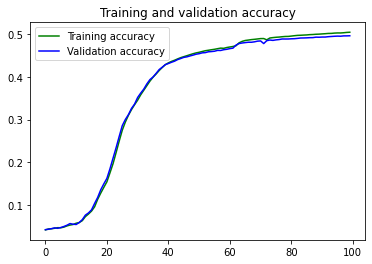

<Figure size 432x288 with 0 Axes>

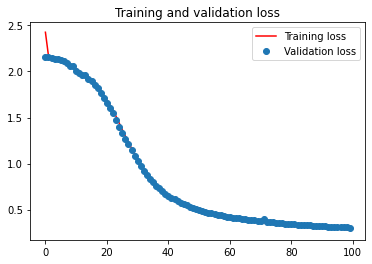

<Figure size 432x288 with 0 Axes>

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig('wordA.png')
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'o', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.savefig('wordL.png')
plt.figure()
plt.show()

In [108]:
from tensorflow import keras
from keras.models import load_model
from keras.layers import Input, LSTM, Dense
from keras.models import Model
#training_model = load_model('/content/drive/My Drive/MachineTranslation/training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.
    
    #A variable to store our response word by word
    decoded_sentence = ''
    
    stop_condition = False
    while not stop_condition:
      #Predicting output tokens with probabilities and states
      output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)
#Choosing the one with highest probability
      sampled_token_index = np.argmax(output_tokens[0, -1, :])
      sampled_token = reverse_target_features_dict[sampled_token_index]
      decoded_sentence += " " + sampled_token
#Stop if hit max length or found the stop token
      if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
        stop_condition = True
#Update the target sequence
      target_seq = np.zeros((1, 1, num_decoder_tokens))
      target_seq[0, 0, sampled_token_index] = 1.
      #Update states
      states_value = [hidden_state, cell_state]
    return decoded_sentence

In [109]:
class Translator:
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
  
  #Method to start the translator
  def start(self):
    user_response = input("Give in an English sentence. :) \n")
    self.translate(user_response)
  
  #Method to handle the conversation
  def translate(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")

  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
  
  #Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, have a great day!")
        return True
    return False
  
translator = Translator()

In [110]:
translator.start()

Give in an English sentence. :) 

 वह स ा ट ् र क े द क द द ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा ा
i like grapes
 म ु झ े अ ं ग ू र पस ं द करत े ह ै ं । 
i like apples
 म ु झ े ब े , स े ब पस ं द ह ै ं । 
i like cars
 म े फ ् ो ा े े पस ं द ी ह ै । 
i live in california
 म ् फ ् र े ं क े ल ा र ् च ी न ी ं ब ू ह ै । 
california
 क ै ल ि फ ़ ो र ् न ि य ा ह ै , ल े क ि न यह आमत ौ र पर यह गर ् म ह ो त ा ह ै । 
i stay in california
 म ् फ ् र े ं क े ल ा र ् च ी न ी ं ब ू ह ै । 
exit
Ok, have a great day!
